In [2]:
%matplotlib notebook
import sys
import math
import h5py
import matplotlib.pyplot as plt
import os
import math
from scipy import integrate
import numpy as np
import csv
sys.path.append('/Users/ajc/Core/PostProcessData/PyScript')
import readdata

In [3]:
molar_den = 1000./0.0180153

In [19]:
def hydrograph(infile):
    #infile = [os.path.join(x + ) for x in infile]
    data = []
    time = []
    for File in infile:
        print ('hydrog: ',File)
        File = os.path.join(File, 'surface_flux-day.dat')
        #print (File)
        with open(File,'r') as file:
            for f in file:
                if not f.startswith('#'):
                    line = f.split()
                    t = float(line[:][0])
                    if (t == 0. or len(time) == 0):
                        data.append(float(line[:][1]))
                        time.append(t)
                    elif (t > time[len(time)-1]):
                        data.append(float(line[:][1]))
                        time.append(t)
        
        remainder = len(data)%(1*365)
        print ('Remainder', remainder)
        if remainder != 0 :
            data = data[:-remainder]
            time = time[:-remainder]
    time = np.array(time)
    data = np.array(data)
    dat = dict(time =time, flux=data)
    #print infile, len(data)
    #print time[0]
    return dat


In [36]:
def PlotHydrograph(infile, color = 'r', label= ''):
    print (infile)
    data = hydrograph(infile)
    data_daily = dict()
    data_annual = dict()
    data_daily = data
    for k, d in data_daily.items():
        print ('K:',k)
        data_annual[k] = d.reshape((-1, 365))
    
    Integrate = []
    years = data_annual['time'].shape[0]
    #print years
    for i in range(years):
        #print (np.sum(data_annual['flux'][i]), np.sum(data_annual['time'][i]))
        x = integrate.trapz(data_annual['flux'][i], data_annual['time'][i])
        x = round(x/molar_den,6)
        Integrate.append(x)
    print ('Integrate: ',Integrate[0])
    #Integrate = [d/Integrate[0] for d in Integrate]

    X = np.arange(2006, 2006 + years, 1)
    plt.legend()
    #plt.show()
    print (X[0],years)
    plt.plot(X[0::1], Integrate[0::1], '.-', color=color, label= label)
    ##plt.xlim(1985, 2015)
    #plt.ylim(0.0, 2000)
    ##plt.xticks(np.arange(1985, 2020, 10))
    #plt.show()
    #plt.close()

<IPython.core.display.Javascript object>


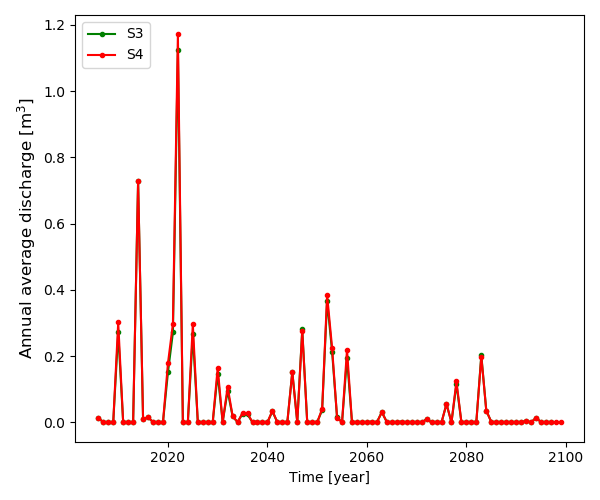

['/Users/ajc/FUSE/simulations/production/barrow_watershed/CESM/CESM_5050_R3_B']
hydrog:  /Users/ajc/FUSE/simulations/production/barrow_watershed/CESM/CESM_5050_R3_B


No handles with labels found to put in legend.


Remainder 135
K: time
K: flux
Integrate:  0.013887
2006 92
['/Users/ajc/FUSE/simulations/production/barrow_watershed/CESM/CESM_5050_R4_B']
hydrog:  /Users/ajc/FUSE/simulations/production/barrow_watershed/CESM/CESM_5050_R4_B
Remainder 362
K: time
K: flux
Integrate:  0.013833
2006 94


In [109]:
fig, axs = plt.subplots(1,1, figsize=(6,5), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)

rt1 = '/Users/ajc/FUSE/simulations/production/barrow_watershed/CESM/'

infileR1 = [rt1 + 'CESM_5050_R1_B']#, rt1 + 'Daymet_40_R1A']
#PlotHydrograph(infileR1,'b', 'S1')

infileR2 = [rt1 + 'CESM_5050_R2_B']
#PlotHydrograph(infileR2,'c', 'S2')

infileR7 = [rt1 + 'CESM_5050_R3_B']
PlotHydrograph(infileR7,'g', 'S3')


infileR5 = [rt1 + 'CESM_5050_R4_B']#, rt1 + 'Daymet_40_R5A']
PlotHydrograph(infileR5,'r', 'S4')


plt.xlabel('Time [year]')
plt.ylabel('Annual average discharge [m$^3$]', fontsize=12, fontweight='normal')
plt.legend()

#plt.legend(loc='upper right', fontsize=10, ncol=3, bbox_to_anchor=(0.7,- 0.32, .1, .1))

plt.tight_layout()
plt.legend(loc='upper left')

#plt.savefig('/Users/ajc/Core/PostProcessData/2020/simulations/barrow_watershed/projections/annual-discharge-A1.png',dpi=100)

plt.show()
#plt.close()

<IPython.core.display.Javascript object>


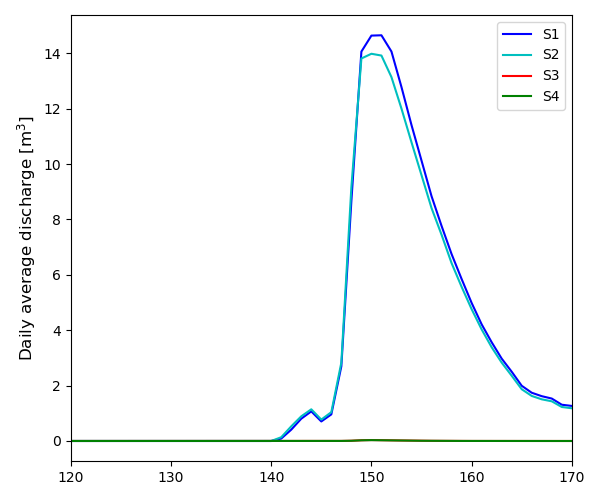

hydrog:  /Users/ajc/FUSE/simulations/production/barrow_watershed/CESM/CESM_5050_R1_B
Remainder 362
hydrog:  /Users/ajc/FUSE/simulations/production/barrow_watershed/CESM/CESM_5050_R2_B
Remainder 362
hydrog:  /Users/ajc/FUSE/simulations/production/barrow_watershed/CESM/CESM_5050_R4_B
Remainder 362
hydrog:  /Users/ajc/FUSE/simulations/production/barrow_watershed/CESM/CESM_5050_R3_B
Remainder 135
(94, 365)


In [108]:
fig, axs = plt.subplots(1,1, figsize=(6,5), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)

HydroData = dict()
HydroData_annual = dict()

dat= hydrograph(infileR1)
HydroData['time-R1'] = dat['time']
HydroData['flux-R1'] = dat['flux']
dat= hydrograph(infileR2)
HydroData['time-R2'] = dat['time']
HydroData['flux-R2'] = dat['flux']

dat= hydrograph(infileR5)
HydroData['time-R5'] = dat['time']
HydroData['flux-R5'] = dat['flux']

dat= hydrograph(infileR7)
HydroData['time-R7'] = dat['time']
HydroData['flux-R7'] = dat['flux']


for key,d in HydroData.items():
    HydroData_annual[key] = d.reshape((-1,365))
    if 'time' in key:
        HydroData_annual[key] = [0*1985 + i/(86400.*365) for i in HydroData_annual[key]]
        
print (np.shape(HydroData_annual['time-R1']))

yr=19
plt.plot(HydroData_annual['flux-R1'][yr],color='b', label='S1')
plt.plot(HydroData_annual['flux-R2'][yr], color ='c', label='S2')

plt.plot(HydroData_annual['flux-R5'][yr], color ='r', label='S3')
plt.plot(HydroData_annual['flux-R7'][yr], color ='g', label='S4')
#plt.xticks(np.arange(0, 365, 10))
plt.xlim(120, 170)
#plt.xlabel('Time [year], 2004')
plt.ylabel('Daily average discharge [m$^3$]', fontsize=12, fontweight='normal')
plt.tight_layout()
plt.legend(loc='upper right')


#plt.savefig('/Users/ajc/AllPostProcessData/simulations/production/polygonal_tundra_1130/discharge-%s.png'%yr)#,dpi=200)

plt.show()
#plt.close()